## Midterm Review

### Linear Regression
Analyzing Customer lifetime value using linear regression. The dependent variable we will use in OLS model is Customer lifetime value. We would like to understand the realtionship between CLV and other variables in the dataset and also build the model using different selection methods and data transformations.

In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.api import qqplot 
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from scipy.stats import shapiro 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from scipy.stats import ttest_ind

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
import scikitplot as skplt 

In [70]:
data=pd.read_excel('CLV.xlsx')

In [71]:
print(data.shape)
data.head()

(9134, 24)


,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,5.0,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,...,42.0,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,NaN,...,38.0,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,...,65.0,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,...,44.0,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer_Lifetime_Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective_To_Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9133 non-null   float64       
 10  Location_Code                  9134 non-null   object        
 11  Marital_Status   

In [73]:
data.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9133.000000,9134.000000,9134.000000,9133.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37656.163583,93.219291,15.097000,48.068433,0.384388,2.966170,434.088794
std,6870.967608,30381.345610,34.407967,10.073257,27.905106,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33882.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62326.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [74]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 3
Single valued columns: Index([], dtype='object')


In [75]:
data.isna().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           1
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    1
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    1
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [81]:
# let's fill with median income 
data.Income = data.Income.fillna(data.Income.median())
# let's fill with mode 
data.Sales_Channel = data.Sales_Channel.fillna(data.Sales_Channel.mode().values[0])
# let's fill with mean Months_Since_Policy_Inception 
data.Months_Since_Policy_Inception = data.Months_Since_Policy_Inception.fillna(data.Months_Since_Policy_Inception.mean())

In [82]:
#the date column can not be directly included in the model
#let's extract Month
data['Month']=data['Effective_To_Date'].apply(lambda x: x.month)
data['Effective_To_Date'].apply(lambda x: x.year)

0       2011
1       2011
2       2011
3       2011
4       2011
        ... 
9129    2011
9130    2011
9131    2011
9132    2011
9133    2011
Name: Effective_To_Date, Length: 9134, dtype: int64

In [83]:
# as we have one year only no need to create a variable
data['Effective_To_Date'].apply(lambda x: x.year).value_counts()

2011    9134
Name: Effective_To_Date, dtype: int64

In [84]:
#dropping ID and date
drops = ["Customer",'Effective_To_Date']
data = data.drop(drops,axis=1)

#### Descriptive analysis

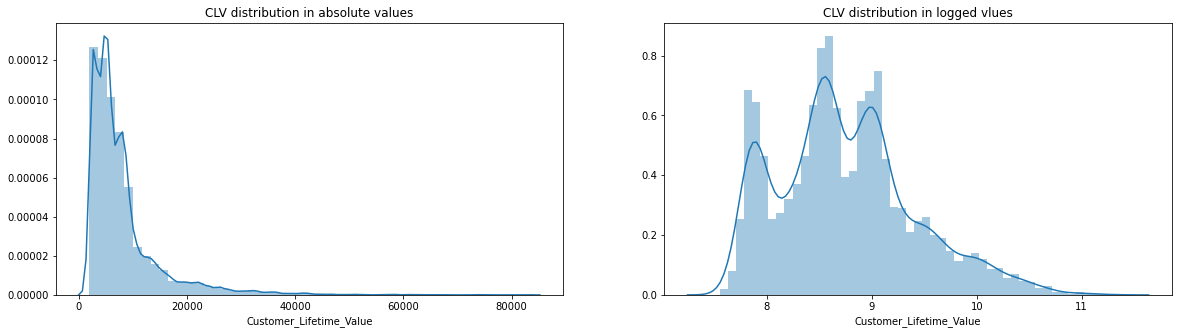

In [85]:
#let's visualise the distribution of CLV vs log(CLV)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(data.Customer_Lifetime_Value)
plt.title("CLV distribution in absolute values")

plt.subplot(1,2,2)
sns.distplot(np.log1p(data.Customer_Lifetime_Value))
plt.title("CLV distribution in logged vlues")

plt.show()

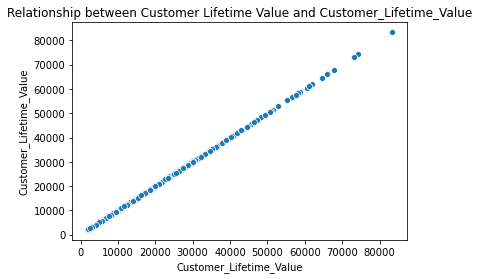

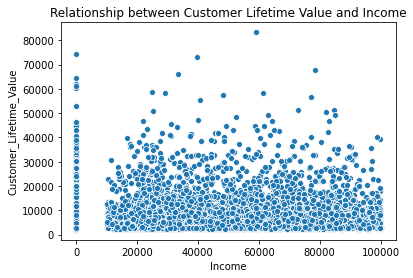

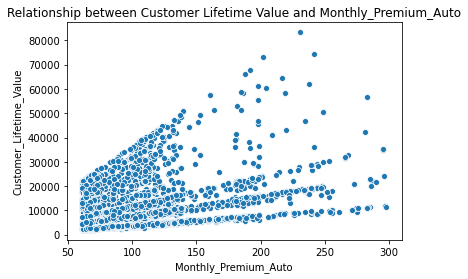

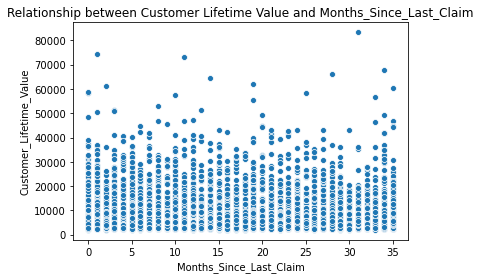

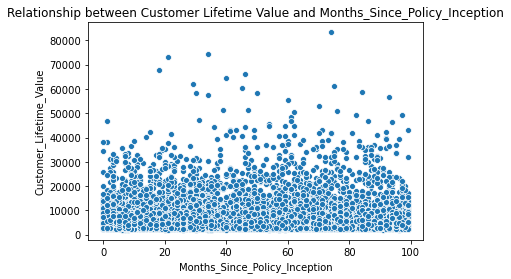

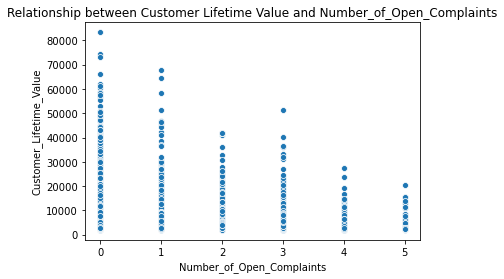

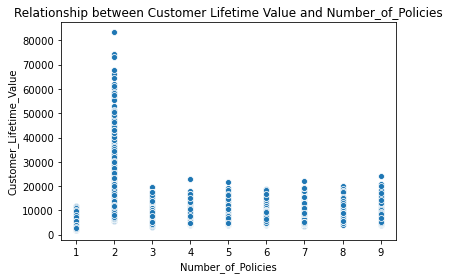

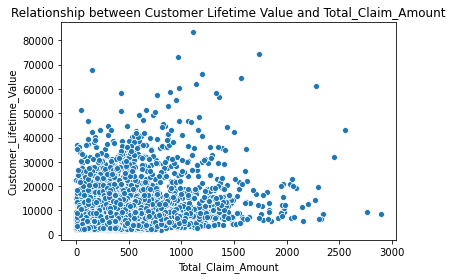

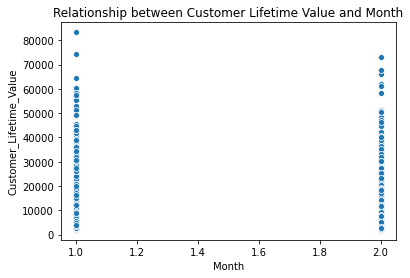

In [136]:
#We can clearly see a positive relationship between CLV and Monthly_premium_auto
for i in data.dtypes[data.dtypes!='O'].index.tolist():
    sns.scatterplot(data[i],data.Customer_Lifetime_Value,)
    plt.xlabel(i)
    plt.ylabel("Customer_Lifetime_Value")
    plt.title(f"Relationship between Customer Lifetime Value and {i}")
    plt.show()

In [88]:
#We can see a lot of customers having 0 income.
#As wee see, all of them are unemployed
data[data.Income==0]["EmploymentStatus"].value_counts()

Unemployed    2317
Name: EmploymentStatus, dtype: int64

In [89]:
pd.pivot_table(data, index = 'EmploymentStatus',values = 'Customer_Lifetime_Value',aggfunc='mean')

,Customer_Lifetime_Value
EmploymentStatus,
Disabled,7847.889354
Employed,8219.117754
Medical Leave,7641.822437
Retired,7487.865141
Unemployed,7636.319761


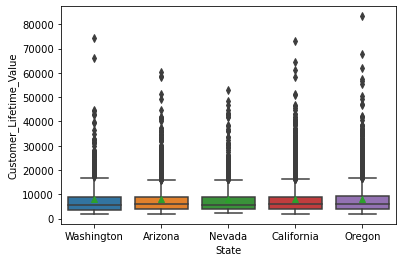

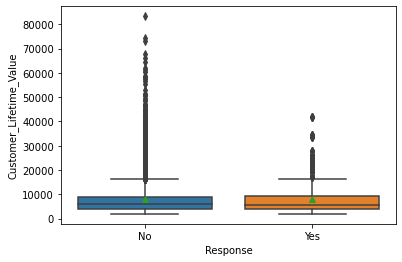

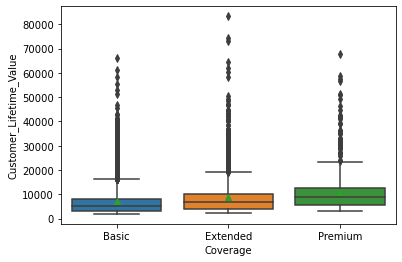

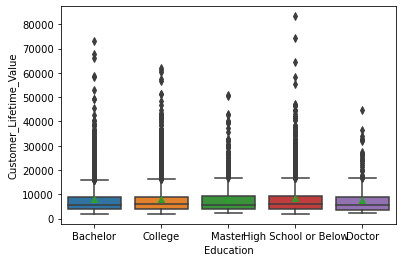

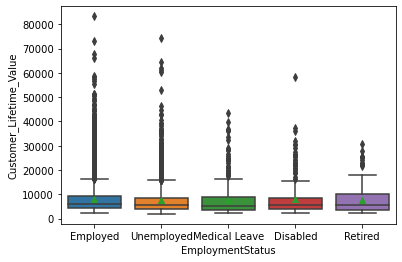

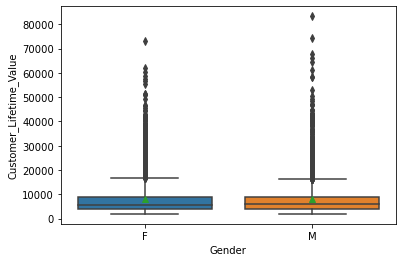

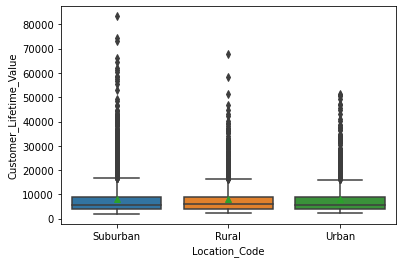

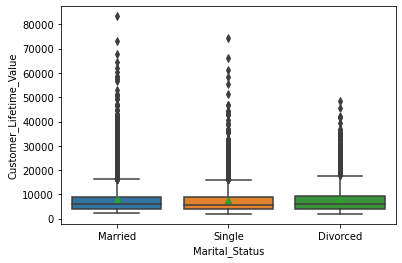

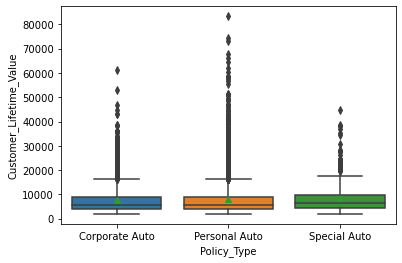

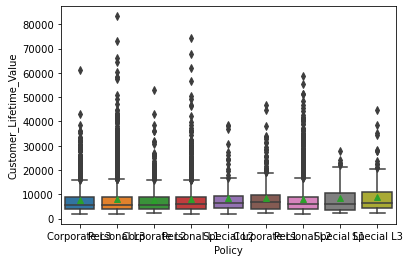

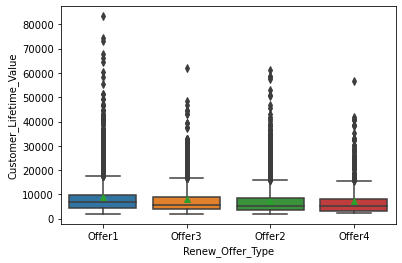

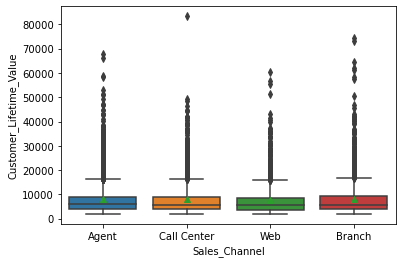

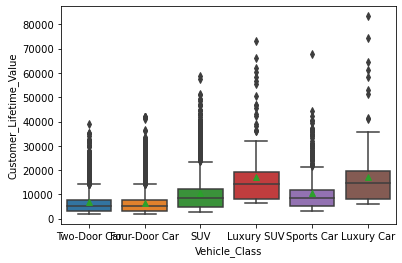

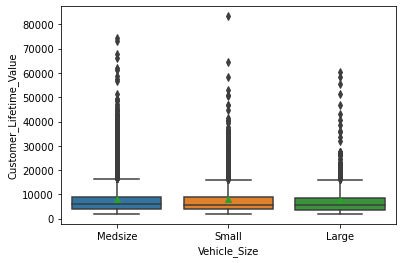

In [90]:
#Let's also see whether mean CLV differs by any of the categorical variables.
#to see that, let's visualize CLV by each categorical variable represented in boxplot.
categoricals=data.dtypes[data.dtypes=="O"].index.tolist()
for i in categoricals:
    sns.boxplot(data=data,x=i,y="Customer_Lifetime_Value", showmeans=True)
    plt.show()

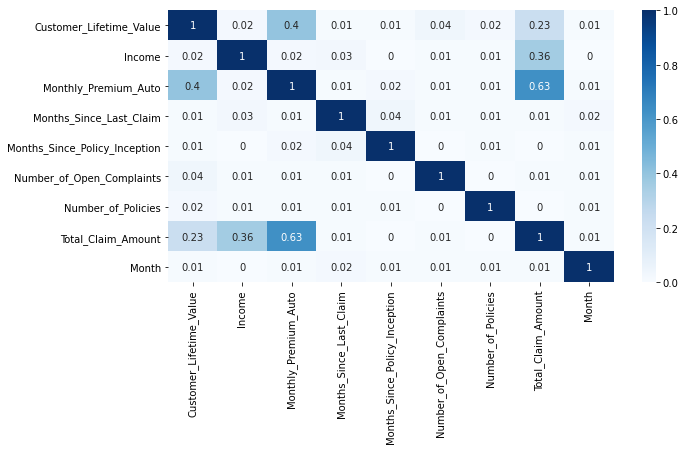

In [91]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "Blues")
plt.show()

In [92]:
for i in data.dtypes[data.dtypes!="O"].index.tolist():
    print(i, data[i].nunique())

Customer_Lifetime_Value 8041
Income 5693
Monthly_Premium_Auto 202
Months_Since_Last_Claim 36
Months_Since_Policy_Inception 101
Number_of_Open_Complaints 6
Number_of_Policies 9
Total_Claim_Amount 5106
Month 2


In [93]:
data.groupby('Number_of_Open_Complaints').Customer_Lifetime_Value.mean()

Number_of_Open_Complaints
0    8058.821347
1    8161.349952
2    8178.407082
3    7337.159632
4    5893.264304
5    6145.675782
Name: Customer_Lifetime_Value, dtype: float64

In [94]:
# p-value is 0.56> 0.05 so we can claim that the difference is not significant
print(data.groupby('Month').Customer_Lifetime_Value.mean())
ttest_ind(data[data.Month==1].Customer_Lifetime_Value,data[data.Month==2].Customer_Lifetime_Value )

Month
1    8043.888001
2    7959.906249
Name: Customer_Lifetime_Value, dtype: float64


Ttest_indResult(statistic=0.5825164354474809, pvalue=0.5602332561807941)

In [95]:
# we can group 1 or 2 or other 
data.groupby('Number_of_Policies').Customer_Lifetime_Value.mean()

Number_of_Policies
1     3606.955098
2    15723.177937
3     6986.213230
4     6997.203422
5     7103.148747
6     6940.635043
7     7237.021119
8     7148.753580
9     7087.842645
Name: Customer_Lifetime_Value, dtype: float64

As it can be seen, visually CLV is significantly different for only some levels of several categorical variables, specifically: "Premium" of Coverage,"Employed" of EmploymentStatus,"Luxury SUV" of Vehicle Class. Thus let's build a model for the noted covariates and the ones having highest correlation with CLV and disregard all the other levels of categorical variables, based on visual evidence and in order to avoid a lot of columns with not significant p-values.

In [96]:
#let's outline only several variables as discussed above and build model on them
selected_feat = ["Number_of_Policies","Total_Claim_Amount", "Number_of_Open_Complaints",
                       "EmploymentStatus","Coverage","Vehicle_Class",'Monthly_Premium_Auto']

### Building the model

In [97]:
#With no transformation
Y = data.Customer_Lifetime_Value
#Y = np.log1p(Y)
X = data.drop(["Customer_Lifetime_Value"],axis=1)
X = pd.get_dummies(X,drop_first=True)
print(X.shape)
X=sm.add_constant(X)
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)
results_initial=sm.OLS(Y0, X0).fit()
Y1_linear=results_initial.predict(X1)
print("R-squared Test:",r2_score(Y1,Y1_linear))
results_initial.summary()

(9134, 51)
R-squared Test: 0.147893618318239


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.174
Model:                                 OLS   Adj. R-squared:                  0.168
Method:                      Least Squares   F-statistic:                     29.31
Date:                     Sat, 24 Oct 2020   Prob (F-statistic):          1.52e-241
Time:                             11:28:14   Log-Likelihood:                -69509.
No. Observations:                     6850   AIC:                         1.391e+05
Df Residuals:                         6800   BIC:                         1.395e+05
Df Model:                               49                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1148.2409   1056.181      1.087      0.277    -922.205    3218.686
Income                             0.0012      0.004      0.278      0.781      -0.007       0.010
Monthly_Premium_Auto              80.7628     11.515      7.014      0.000      58.190     103.336
Months_Since_Last_Claim            5.7741      7.457      0.774      0.439      -8.845      20.393
Months_Since_Policy_Inception      1.3244      2.715      0.488      0.626      -3.997       6.646
Number_of_Open_Complaints       -307.7608     82.370     -3.736      0.000    -469.231    -146.291
Number_of_Policies                50.5290     31.515      1.603      0.109     -11.250     112.308
Total_Claim_Amount                 0.4092      0.539      0.759      0.448      -0.647       1.466
Month                           -169.1254    150.777     -1.122      0.262    -464.696     126.446
State_California                  10.9501    217.124      0.050      0.960    -414.681     436.581
State_Nevada                     -63.0386    295.511     -0.213      0.831    -642.333     516.256
State_Oregon                    -145.4250    224.915     -0.647      0.518    -586.329     295.479
State_Washington                 -62.3431    311.239     -0.200      0.841    -672.468     547.782
Response_Yes                    -306.2069    238.453     -1.284      0.199    -773.649     161.235
Coverage_Extended               -195.6998    286.271     -0.684      0.494    -756.881     365.481
Coverage_Premium                -804.2618    600.820     -1.339      0.181   -1982.057     373.534
Education_College                  9.0886    195.877      0.046      0.963    -374.892     393.070
Education_Doctor                -184.8589    403.542     -0.458      0.647    -975.927     606.210
Education_High School or Below   486.0451    198.046      2.454      0.014      97.814     874.277
Education_Master                 538.0494    303.694      1.772      0.076     -57.286    1133.385
EmploymentStatus_Employed        243.6949    398.894      0.611      0.541    -538.263    1025.652
EmploymentStatus_Medical Leave   103.6339    494.132      0.210      0.834    -865.020    1072.288
EmploymentStatus_Retired        -223.4887    564.736     -0.396      0.692   -1330.548     883.570
EmploymentStatus_Unemployed     -247.1141    404.159     -0.611      0.541   -1039.392     545.164
Gender_M                         -57.3103    151.570     -0.378      0.705    -354.435     239.815
Location_Code_Suburban          -545.5551    301.012     -1.812      0.070   -1135.633      44.523
Location_Code_Urban             -233.2186    275.002     -0.848      0.396    -772.309     305.872
Marital_Status_Married           -52.1344    221.749     -

### Transformations

In [98]:
#separating X and Y
Y = data.Customer_Lifetime_Value
X = data.drop(["Customer_Lifetime_Value"],axis=1)

In [99]:
#log-transforming Customer Lifetime Value
Y = np.log1p(Y)
X = X[selected_feat]
X.shape

(9134, 7)

In [100]:
#transforming the selected features
X["Number_of_Policies_1"] = np.where(X.Number_of_Policies==1,1,0) #making a dummy variable when # of policies=1
X["Number_of_Policies"] = np.where(X.Number_of_Policies==2,1,0) #making a dummy variable when # of policies=2
X["EmploymentStatus"] = np.where(X.EmploymentStatus=="Employed",1,0) #outlining Employed customers
X["Coverage"] = np.where(X.Coverage=="Premium",1,0) #outlining Premium coverage

In [101]:
#getting dummies
X = pd.get_dummies(X,drop_first=True)

In [102]:
#adding constant to X
X=sm.add_constant(X)

In [103]:
#splitting the data into train and test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [104]:
#observing the results
results=sm.OLS(Y0, X0).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.895
Model:                                 OLS   Adj. R-squared:                  0.895
Method:                      Least Squares   F-statistic:                     4851.
Date:                     Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                             11:28:14   Log-Likelihood:                 958.03
No. Observations:                     6850   AIC:                            -1890.
Df Residuals:                         6837   BIC:                            -1801.
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          7.8896      0.017    454.125      0.000       7.856       7.924
Number_of_Policies             0.6990      0.006    107.815      0.000       0.686       0.712
Total_Claim_Amount         -3.119e-05   1.26e-05     -2.482      0.013   -5.58e-05   -6.56e-06
Number_of_Open_Complaints     -0.0246      0.003     -8.843      0.000      -0.030      -0.019
EmploymentStatus               0.0825      0.006     14.095      0.000       0.071       0.094
Coverage                      -0.0270      0.013     -2.119      0.034      -0.052      -0.002
Monthly_Premium_Auto           0.0097      0.000     41.909      0.000       0.009       0.010
Number_of_Policies_1          -0.6943      0.006   -117.651      0.000      -0.706      -0.683
Vehicle_Class_Luxury Car      -0.2777      0.035     -7.968      0.000      -0.346      -0.209
Vehicle_Class_Luxury SUV      -0.2587      0.035     -7.441      0.000      -0.327      -0.191
Vehicle_Class_SUV              0.0399      0.012      3.403      0.001       0.017       0.063
Vehicle_Class_Sports Car       0.0599      0.015      3.927      0.000       0.030       0.090
Vehicle_Class_Two-Door Car     0.0036      0.007      0.538      0.591      -0.009       0.017
==============================================================================
Omnibus:                     2145.767   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8460.360
Skew:                           1.513   Prob(JB):                         0.00
Kurtosis:                       7.526   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
#predicting for train and test data
Y1_linear=results.predict(sm.add_constant(X1))
Y0_linear=results.predict(X0)

In [106]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:",r2_score(Y0,Y0_linear))
print("R-squared Test:",r2_score(Y1,Y1_linear))

R-squared Train: 0.8948870607133235
R-squared Test: 0.895280356498335


##### Interpretation of the results of Linear Regression for log(CLV)
Note: As we have log-linear model, to interpret the effect of significant independent variable on CLV you should multiply coefficient estimate with 100 and interpret the result in %.


I.e. for Total_Claim_Amount it will be the following: 1 unit change in Total_Claim_Amount leads to 100*0.0001=0.01‬% percent change in CLV.


 - R-squared and F-statistics: As Prob (F-statistic) shows our model is statistically significant at 5% significance level, so there is at least one estimated coefficient (besides intercept) that is not null. R-squared is quite big number and it shows that 86.8% of variance in log(CLV) is explained by the variables included in the model.
 - Adj. R-squared: As summary shows it's the same as R-squared, 86.8% which means that we have a very consistent model.
 - Statistically significant variables: As p-values of t-statistics show, all variables included in the model are statistically significant at 5% sig. level (p<=0.05).
 - Coefficients (continous variable): Let's interpret for Total_Claim_Amount. For each unit increase in Total_Claim_Amount we will experience on average about 0.0001 dollars increase in mean log(CLV).
 - Coefficients (categorical variable):Let's interpret for Vehicle_Class,   - Luxury SUV subclass. If a car has "Luxury SUV" class rather than "Four-Door Car" then on average 0.9270 dollars increase is expected in mean log(CLV).

### Internal validity check

In [107]:
#residuals of the model
residuals=results.resid
predicted_values=results.predict()

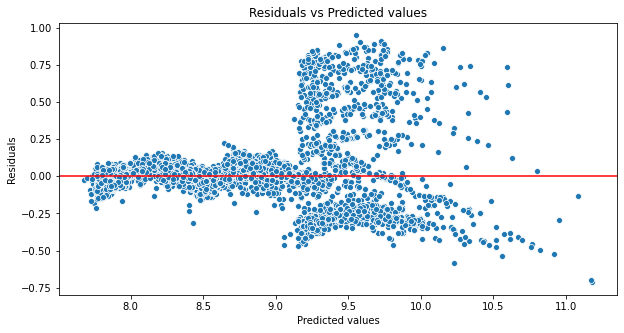

In [108]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
sns.scatterplot(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

The residuals vs fitted values plot pattern is not totally random and we can see groups of observations scattered together around some points. We also observe a very high variance from the left to the right.

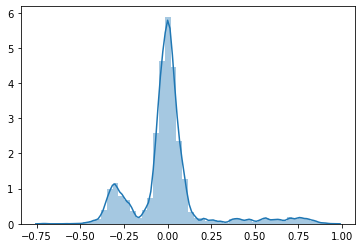

In [109]:
#normality
sns.distplot(residuals)
plt.show()

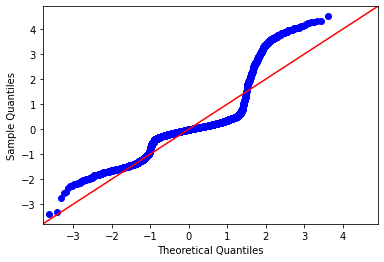

In [110]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

The residuals distribution plot shows that the distribution is not normal. QQ-plot shows a nonlinear pattern too.

In [111]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 1.0481110003296574), ('p-value', 0.08480138691160503)]


Linearity assumption is held at 5% significance level (p-value=0.08>0.05).

In [112]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 2635.114743304449), ('p-value', 0.0), ('f-value', 356.20343937304847), ('f p-value', 0.0)]


We reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is not held.


In [113]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro_test=shapiro(residuals)
print(list(zip(snames, shapiro_test)))

[('The test statistic', 0.809862494468689), ('p-value', 0.0)]


/Users/zaranavasardyan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test confirms that the data was not drawn from a normal distribution.

In [114]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
var=X.columns.tolist()
vif = [variance_inflation_factor(X[var].values, i) for i in range(0,len(var))]
vif = dict(zip(var,vif))
vif

{'const': 46.429660978047075,
 'Number_of_Policies': 1.2287663730267993,
 'Total_Claim_Amount': 2.0625666203668604,
 'Number_of_Open_Complaints': 1.0012516753722347,
 'EmploymentStatus': 1.2361887109233245,
 'Coverage': 2.0832891278712853,
 'Monthly_Premium_Auto': 9.665601936726759,
 'Number_of_Policies_1': 1.2286524898398514,
 'Vehicle_Class_Luxury Car': 3.3691662681343155,
 'Vehicle_Class_Luxury SUV': 3.6957773003813057,
 'Vehicle_Class_SUV': 3.3394727237082096,
 'Vehicle_Class_Sports Car': 1.791533436166808,
 'Vehicle_Class_Two-Door Car': 1.1179437542908124}

# Logistic Regression

In [115]:
selected_feat

['Number_of_Policies',
 'Total_Claim_Amount',
 'Number_of_Open_Complaints',
 'EmploymentStatus',
 'Coverage',
 'Vehicle_Class',
 'Monthly_Premium_Auto']

In [116]:
#separating X and Y
Y = data.Customer_Lifetime_Value
X = data.drop(["Customer_Lifetime_Value"],axis=1)
X = X[selected_feat]
X = pd.get_dummies(X,drop_first=True)

In [117]:
Y = Y>Y.median()
Y = Y.astype(int)

In [118]:
Y.value_counts()

0    4568
1    4566
Name: Customer_Lifetime_Value, dtype: int64

In [119]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [120]:
logit=LogisticRegression(random_state=42)
logit.fit(X0,Y0)

/Users/zaranavasardyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [121]:
Y0_logit=logit.predict_proba(X0)[:,1]
Y1_logit=logit.predict_proba(X1)[:,1]

print("ROC_AUC Train for tuned Logit:",roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test for tuned Logit:",roc_auc_score(Y1,Y1_logit))

ROC_AUC Train for tuned Logit: 0.7512953376710616
ROC_AUC Test for tuned Logit: 0.7619501275483767


In [122]:
#building GridSearch with Logistic Regression
logit_1=LogisticRegression(random_state=42)

param_logit = { 'C':np.linspace(1,10,20),
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gs_logit=GridSearchCV(estimator=logit_1, param_grid=param_logit,
                      scoring="roc_auc", cv=5, verbose=1, n_jobs=-1).fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   55.0s finished


In [123]:
#finding out the best parameters
best_params = gs_logit.best_params_
print(best_params)

{'C': 10.0, 'solver': 'newton-cg'}


In [124]:
#building logit with best params and seeing the results
logit_grid=LogisticRegression(random_state=42, C=best_params['C'],
                              solver=best_params['solver']).fit(X0,Y0)

Y0_logit_grid=logit_grid.predict_proba(X0)[:,1]
Y1_logit_grid=logit_grid.predict_proba(X1)[:,1]

In [125]:
print("ROC_AUC Train for tuned Logit:",roc_auc_score(Y0,Y0_logit_grid))
print("ROC_AUC Test for tuned Logit:",roc_auc_score(Y1,Y1_logit_grid))

ROC_AUC Train for tuned Logit: 0.7550495639891651
ROC_AUC Test for tuned Logit: 0.7666367531242252


In [133]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y0,logit_grid.predict(X0)))

print("Logistic Regression Test:")
print(classification_report(Y1,logit_grid.predict(X1)))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3387
           1       0.71      0.69      0.70      3463

    accuracy                           0.70      6850
   macro avg       0.70      0.70      0.70      6850
weighted avg       0.70      0.70      0.70      6850

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1181
           1       0.71      0.69      0.70      1103

    accuracy                           0.71      2284
   macro avg       0.71      0.71      0.71      2284
weighted avg       0.71      0.71      0.71      2284



In [126]:
coefs = pd.DataFrame({'feature':X0.columns.tolist(),'coef':logit.coef_[0].tolist()})
coefs['coef_abs']=coefs.coef.abs()
coefs=coefs.sort_values('coef_abs',ascending=False)
coefs

,feature,coef,coef_abs
7,EmploymentStatus_Unemployed,-0.866462,0.866462
8,Coverage_Extended,0.643976,0.643976
9,Coverage_Premium,0.632868,0.632868
4,EmploymentStatus_Employed,-0.473240,0.473240
5,EmploymentStatus_Medical Leave,-0.422253,0.422253
10,Vehicle_Class_Luxury Car,0.344854,0.344854
11,Vehicle_Class_Luxury SUV,0.344496,0.344496
12,Vehicle_Class_SUV,0.261753,0.261753
6,EmploymentStatus_Retired,-0.246308,0.246308
0,Number_of_Policies,0.218866,0.218866


In [127]:
#Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
CV_scores = cross_val_score(estimator=logit_grid, X=X, y=Y, cv=5, scoring="roc_auc")
print(CV_scores)

[0.7544944  0.75706966 0.76699318 0.76962834 0.74988453]


In [128]:
print("Mean 5-fold ROC AUC", np.mean(CV_scores))

Mean 5-fold ROC AUC 0.7596140227298644
